## OpenCV 임계점 처리하기
- thresh(임계점) : "문턱" 


cv2.threshold(1. image, 2. thresh, 3. max_value, 4. type): 임계값을 기준으로 흑/백으로 분류하는 함수

- image: 처리할 Gray Scale 이미지
- thresh: 임계 값 (전체 픽셀에 적용)
- max_value: 임계 값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식

  - 1) THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0

  - 2) THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0

  - 3) THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로

  - 4) THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0

  - 5) THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hand_writing_image.jpg to hand_writing_image.jpg


In [4]:
import cv2
import matplotlib.pyplot as plt

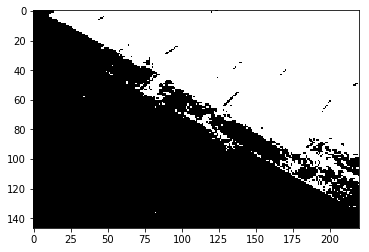

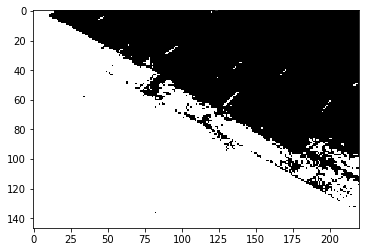

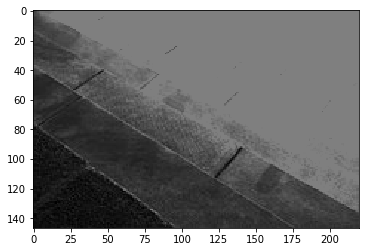

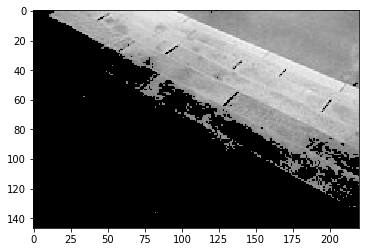

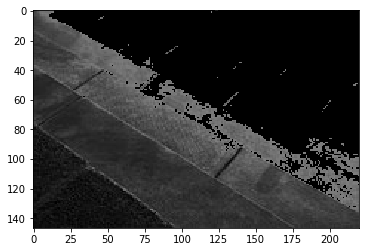

In [ ]:
image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) # 127기준으로 크면 255 작으면 0으로 바꾼다
# ret은 값을 반환했나 안했나의 boolean값.. 무시해도 되는듯?
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

## 부분픽셀 적용하기 (위에는 전체픽셀에 똑같이 적용하는 방법)
cv2.adaptiveThreshold(1. image, 2. max_value, 3. **adaptive_method**, 4. type, 5. block_size, 6. C): 적응 임계점 처리 함수

하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋습니다.

- 2. max_value: 임계 값을 넘었을 때 적용할 값

- 3. adaptive_method: 임계 값을 결정하는 계산 방법 [임계값을 위에선 **직접적으로& 그리고 전체 획일적으로** 주었지만! 여기서는 **자동으로 & 각각 부분적으로** 인셈]
  - -> 간단히 말해서, 각 부분마다 알아서 임계점 찾아주는 방법.

  - 1) ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정

  - 2) ADAPTIVE_THRESH_GAUSSIAN_C

- 4. type: 임계점을 처리하는 방식

- 5. block_size: 임계 값을 적용할 영역의 크기 (임계치로 인한 테두리 두께라고 보면될듯)

- 6. C: 평균이나 가중 평균에서 차감할 값 3.에서 조정치로 줄 값임

  - -> 5,6은 하이퍼 파라미터라고 생각하면 될듯

Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않습니다.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hand_writing_image.jpg to hand_writing_image (1).jpg


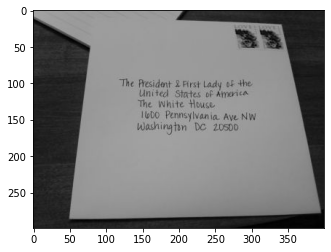

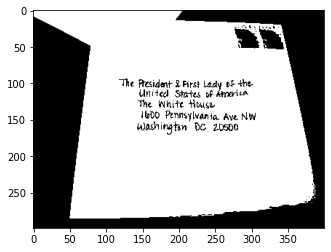

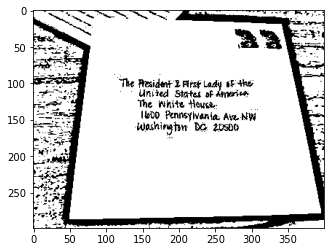

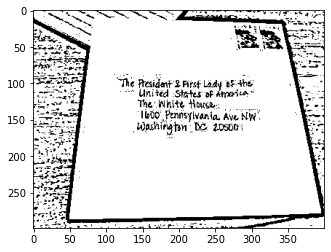

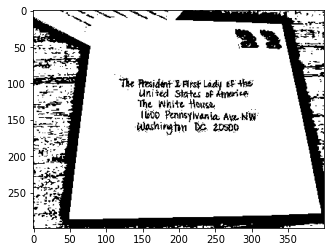

In [5]:
import cv2

image = cv2.imread('hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) # 전체에 동일하게 적용
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3) # 부분적용 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

# blocksize 더 작게
thres3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)
plt.imshow(cv2.cvtColor(thres3, cv2.COLOR_GRAY2RGB))
plt.show()

# blocksize 더 크게
thres4 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
plt.imshow(cv2.cvtColor(thres4, cv2.COLOR_GRAY2RGB))
plt.show()